In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
os.chdir("C:/Users/GUILLERMO/Desktop/U/Noveno Semestre/MLE/Quiz")

In [44]:
nombres = ['X1', 'X2', 'Y']
dataset = pd.read_csv("dat.csv", names=nombres)

In [46]:
dataset.head(5)

,X1,X2,Y
0,0.931719,50.942832,2596.040230
1,0.796997,50.312938,2532.026902
2,1.115603,50.156194,2516.888332
3,1.064629,50.774814,2579.215190
4,1.796804,50.055668,2508.798424


In [47]:
dataset['unos'] = 1

In [48]:
dataset.head(5)

,X1,X2,Y,unos
0,0.931719,50.942832,2596.040230,1
1,0.796997,50.312938,2532.026902,1
2,1.115603,50.156194,2516.888332,1
3,1.064629,50.774814,2579.215190,1
4,1.796804,50.055668,2508.798424,1


In [55]:
dataset.describe()

,X1,X2,Y,unos
count,160000.000000,160000.000000,160000.000000,160000.0
mean,50.500541,125.500304,21022.721441,1.0
std,28.941916,43.410518,11431.169433,0.0
min,0.005602,50.000327,2508.798424,1.0
25%,25.447165,87.920449,11396.721998,1.0
50%,50.484801,125.478611,19295.522001,1.0
75%,75.562682,163.088470,30087.156122,1.0
max,100.999474,200.999283,50357.161540,1.0


In [50]:
x = dataset[['unos', 'X1', 'X2']]
y = dataset[['Y']]

In [52]:
x = np.array(x)
y = np.array(y)

In [53]:
x

array([[  1.        ,   0.93171898,  50.94283198],
       [  1.        ,   0.79699735,  50.31293767],
       [  1.        ,   1.11560347,  50.15619364],
       ...,
       [  1.        ,  99.92751651, 200.74008125],
       [  1.        , 100.11992503, 200.83117824],
       [  1.        , 100.06223037, 200.79717462]])

In [54]:
y

array([[ 2596.04023035],
       [ 2532.02690204],
       [ 2516.88833189],
       ...,
       [50282.08877772],
       [50357.16153995],
       [50331.95528229]])

In [60]:
m, n = x.shape
theta_0 = np.random.rand(n,1)
theta_0

array([[0.46188783],
       [0.92378001],
       [0.57609838]])

In [61]:
np.random.shuffle(x)
np.random.shuffle(y)

In [57]:
print(160000*.7)
print((160000*.7)+(160000*.15))
print((160000*.7)+(160000*.15)*2)

112000.0
136000.0
160000.0


In [62]:
x_train = x[:112000]
x_cv = x[112000:136000]
x_test = x[136000:160000]

y_train = y[:112000]
y_cv = y[112000:136000]
y_test = y[136000:160000]

In [63]:
x_train

array([[  1.        ,  68.90264881,  82.62781704],
       [  1.        ,  20.09236679, 135.77679861],
       [  1.        ,  89.04736117, 161.45659291],
       ...,
       [  1.        ,  85.43125679, 179.82795956],
       [  1.        ,  75.57540245,  82.05417077],
       [  1.        ,  92.8839123 ,  79.35143782]])

In [64]:
x_test

array([[  1.        ,  10.75450299, 191.49147767],
       [  1.        ,  81.3726069 , 194.82383541],
       [  1.        ,  54.34135186, 123.95402964],
       ...,
       [  1.        ,  99.12439249, 162.07892689],
       [  1.        ,  69.79865667, 160.93948562],
       [  1.        ,  79.63371354, 191.38751323]])

In [65]:
x_cv

array([[  1.        ,  21.63807015, 188.59050069],
       [  1.        ,  21.11749391, 188.07755388],
       [  1.        ,  37.51842445, 143.12759717],
       ...,
       [  1.        ,  30.95466268, 156.78330122],
       [  1.        ,  18.66334611,  62.58088086],
       [  1.        ,  99.14373579,  64.40272269]])

In [69]:
# Funciones predeterminadas a usar #

def linear_c(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def linear_gradient_c(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

def gradient_descent_c(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
    return theta, costs, thetas

In [70]:
theta_r, costs, thetas = gradient_descent_c(x_train, y_train, theta_0, linear_c, linear_gradient_c)

<function matplotlib.pyplot.show(*args, **kw)>

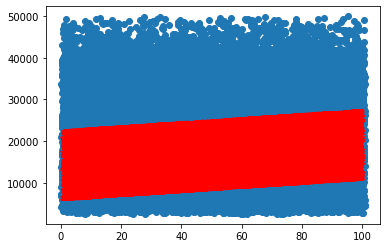

In [73]:
#?????????????????????????????? KHE ????????????????????????????#
plt.scatter(x_cv[:,1], y_cv)
plt.plot(x_cv[:,1], x_cv @ theta_r, color = 'red')
plt.show

In [ ]:
plt.scatter(x_test[:,1], y_test)
plt.plot(x_cv[:,1], x_cv @ theta_r, color = 'red')
plt.show